structural_similarity -  helps us finding the structural similarity core between the org and tampered image

imutils - helps to grab the contours of the image

PIL - helps to load the image and visualise it (Image.open())

requests - hep to fetch the data from url (get(), )

In [3]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [4]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: pan_card_tampering: File exists
mkdir: pan_card_tampering/image: File exists


In [5]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

In [6]:
# format of the image
print("Original image format : ", original.format)
print("tampered image format : ", tampered.format)

# size of the image output will be given as 2-tuple
print("Original image size : ", original.size)
print("tampered image size : ",tampered.size)

Original image format :  JPEG
tampered image format :  PNG
Original image size :  (1200, 800)
tampered image size :  (282, 179)


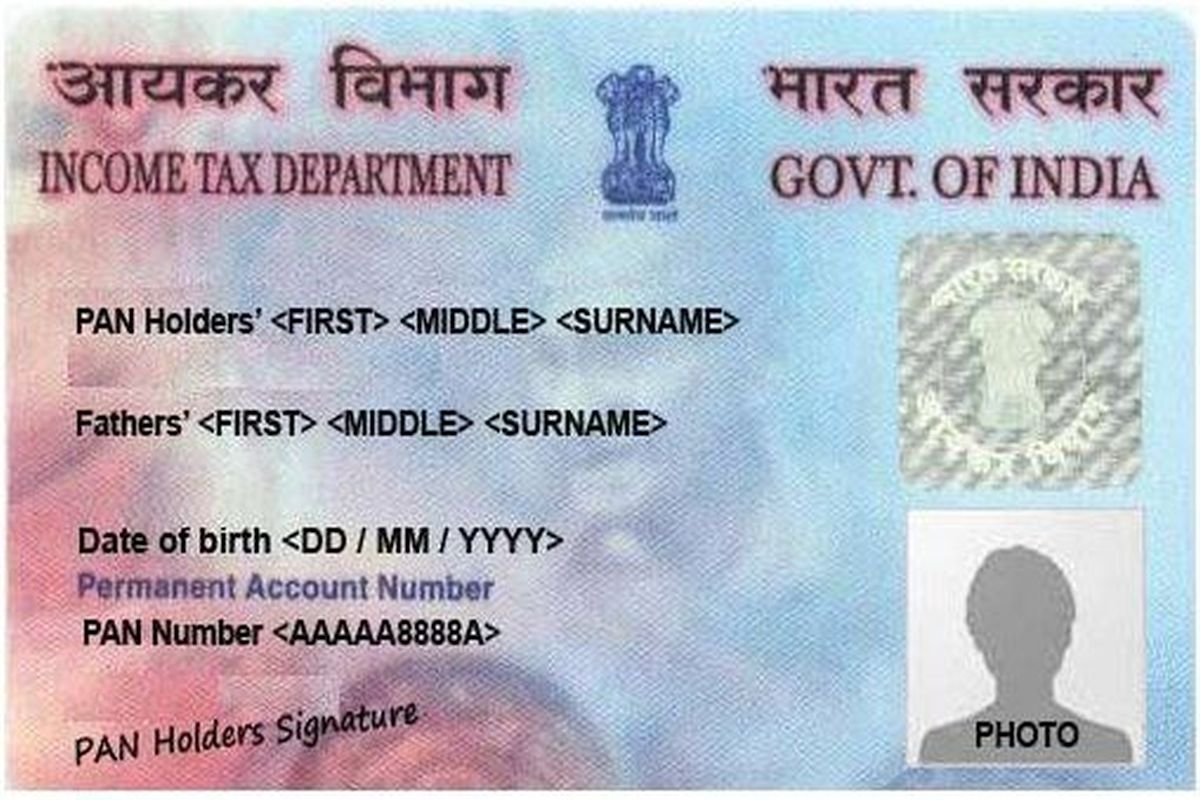

In [7]:
original

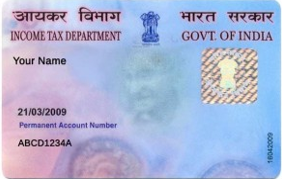

In [8]:
tampered

In [9]:
# Resizing the images
original = original.resize((250,160))
print(original.size)
tampered = tampered.resize((250,160))
print(tampered.size)

(250, 160)
(250, 160)


In [10]:
original.save('pan_card_tampering/image/original.png')
tampered.save('pan_card_tampering/image/tampered.png')

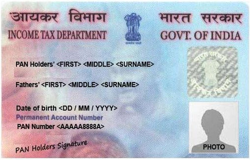

In [11]:
original

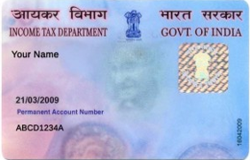

In [12]:
tampered

In [13]:
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [14]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [15]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


In [17]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [18]:
for c in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w,y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w,y + h), (0, 0, 255), 2)
  

Original Image format


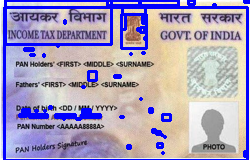

In [19]:
print("Original Image format")
Image.fromarray(original)

Tampered Image format


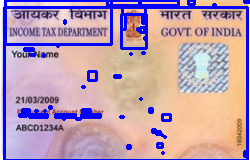

In [20]:
print("Tampered Image format")
Image.fromarray(tampered)

Different Image


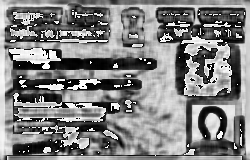

In [21]:
print("Different Image")
Image.fromarray(diff)

Threshold Image


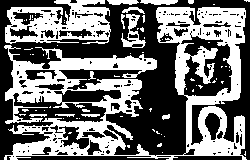

In [22]:
print("Threshold Image")
Image.fromarray(thresh)